In [ ]:
!pip install keras-facenet
!pip install MTCNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of image/array: (2608, 4624, 3)


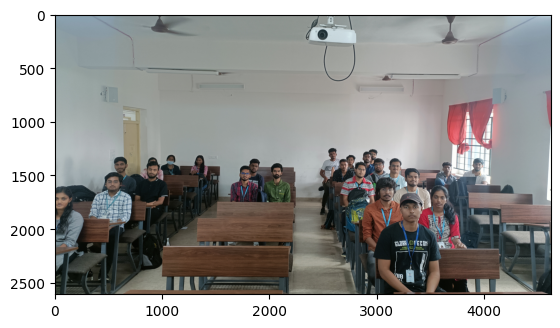

In [ ]:
import matplotlib.pyplot as plt
import mtcnn

# load image from file
filename = "./TARP-Class-Image.jpg"
classIMG = plt.imread(filename)
print("Shape of image/array:",classIMG.shape)
imgplot = plt.imshow(classIMG)
plt.show()

In [ ]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
    # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='cyan', linewidth = 1)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(classIMG)

# for face in faces:
#   print(face["confidence"])

print(faces)
# display faces on the original im

7/7 [==============================] - 0s 37ms/step
[{'box': [3274, 1477, 97, 115], 'confidence': 0.9999998211860657, 'keypoints': {'left_eye': (3308, 1517), 'right_eye': (3357, 1520), 'nose': (3336, 1538), 'mouth_left': (3309, 1562), 'mouth_right': (3351, 1565)}}, {'box': [482, 1513, 112, 132], 'confidence': 0.9999997019767761, 'keypoints': {'left_eye': (513, 1565), 'right_eye': (564, 1564), 'nose': (535, 1588), 'mouth_left': (514, 1613), 'mouth_right': (558, 1613)}}, {'box': [3222, 1732, 174, 206], 'confidence': 0.9999995827674866, 'keypoints': {'left_eye': (3274, 1802), 'right_eye': (3354, 1799), 'nose': (3320, 1842), 'mouth_left': (3286, 1888), 'mouth_right': (3348, 1886)}}, {'box': [2809, 1413, 78, 104], 'confidence': 0.9999993443489075, 'keypoints': {'left_eye': (2837, 1448), 'right_eye': (2871, 1454), 'nose': (2855, 1468), 'mouth_left': (2833, 1486), 'mouth_right': (2863, 1491)}}, {'box': [1815, 1384, 72, 91], 'confidence': 0.9999985098838806, 'keypoints': {'left_eye': (1841, 14

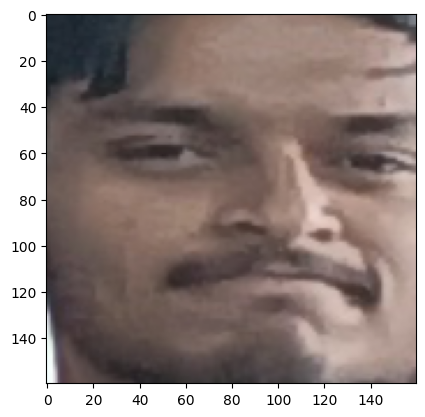

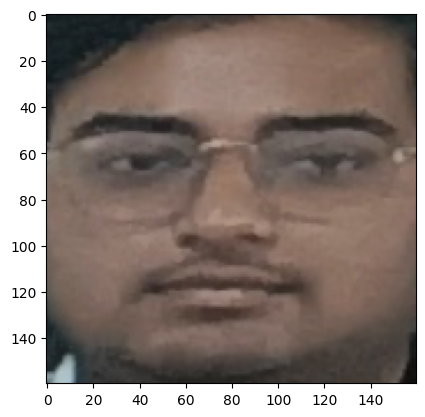

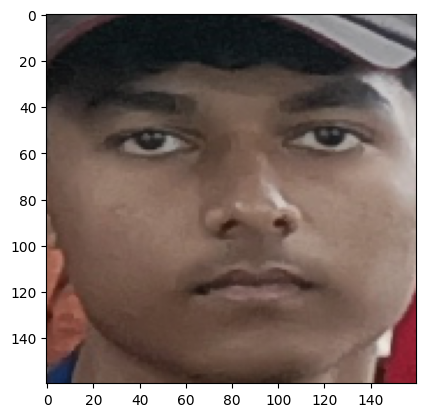

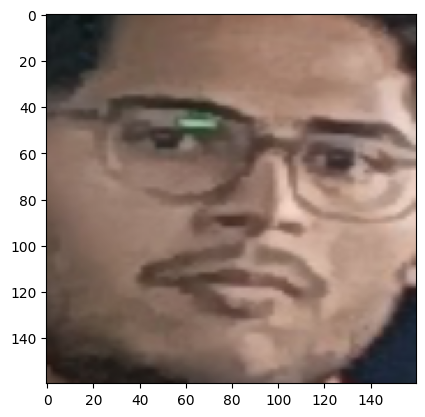

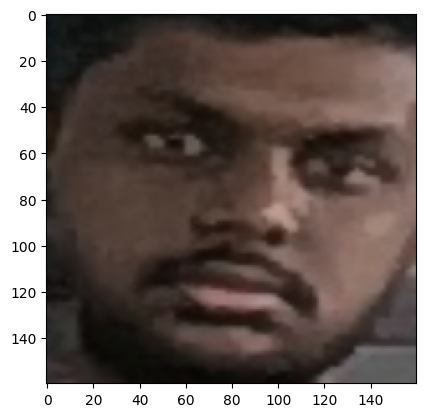

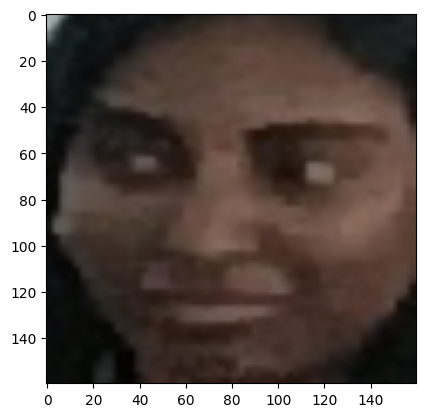

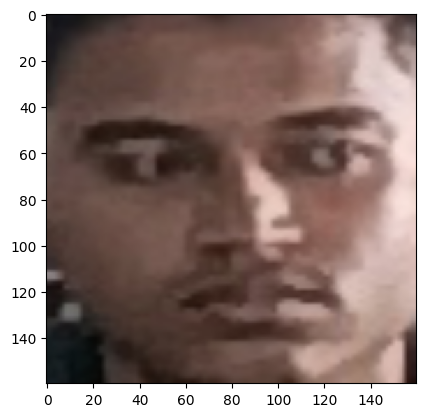

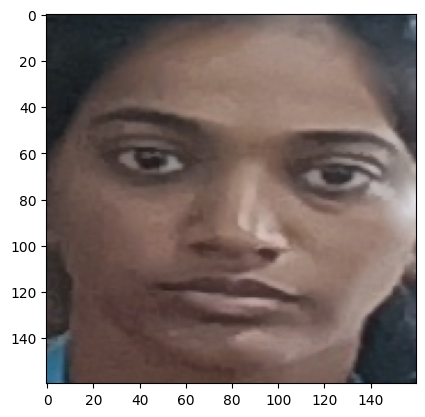

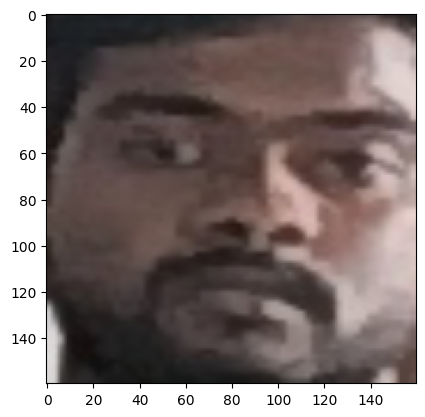

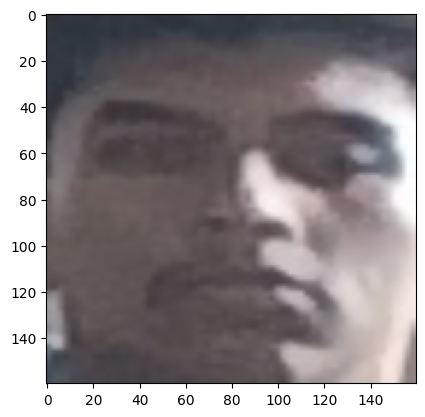

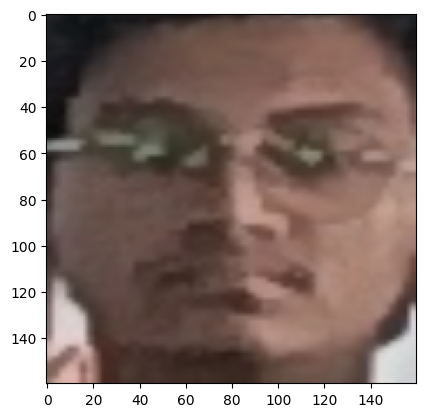

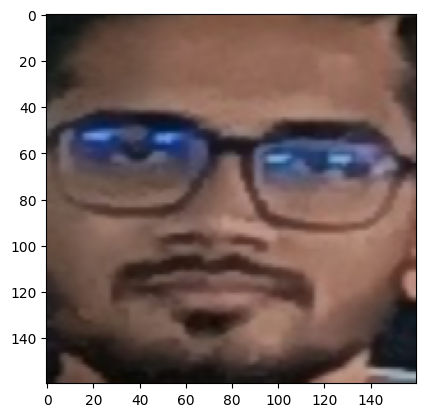

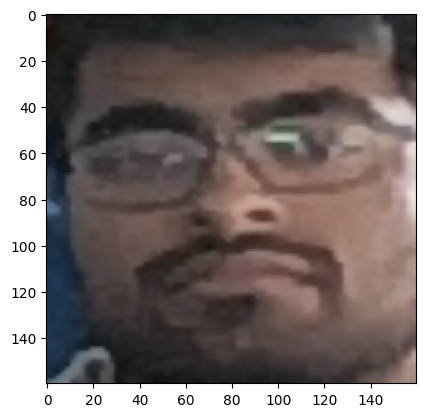

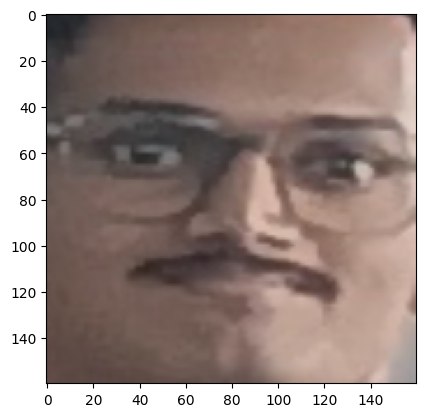

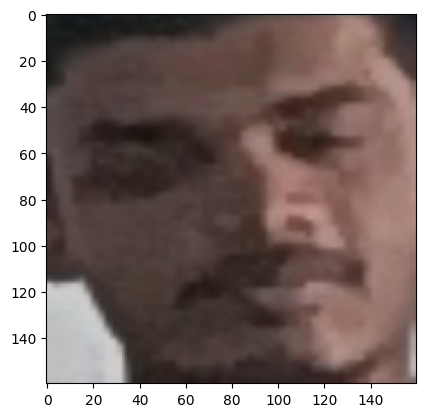

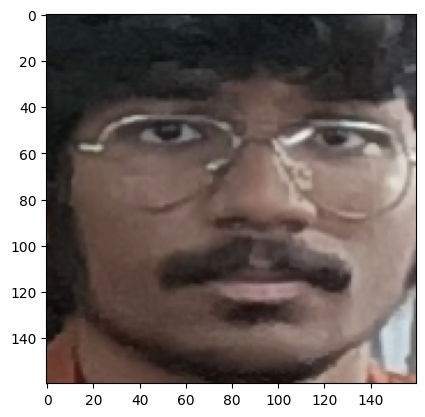

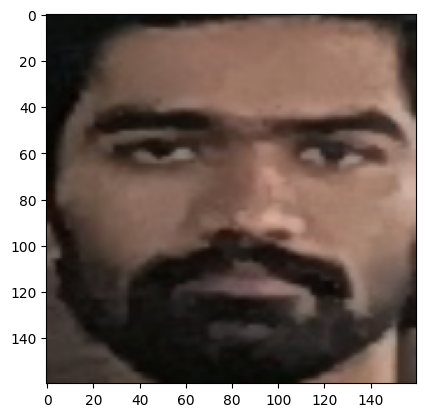

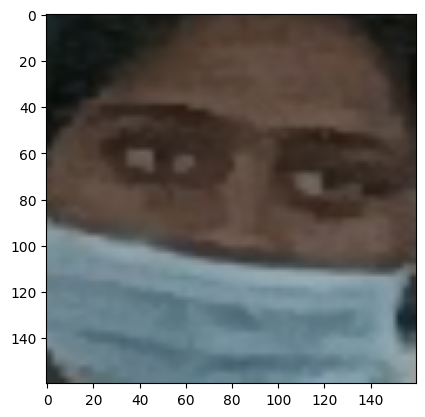

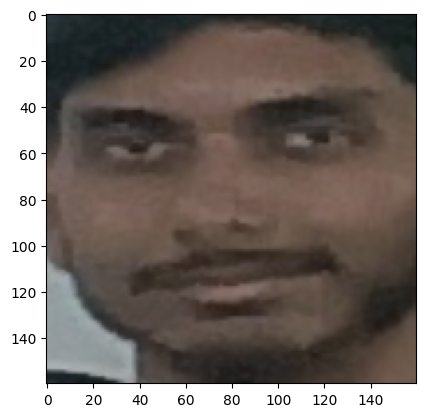

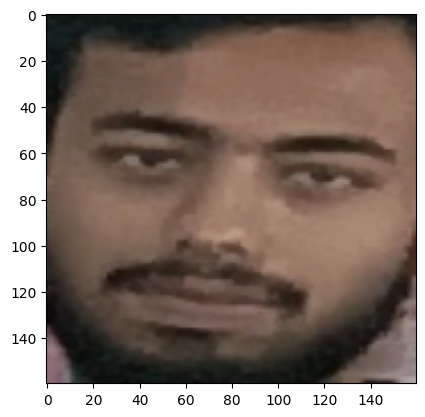

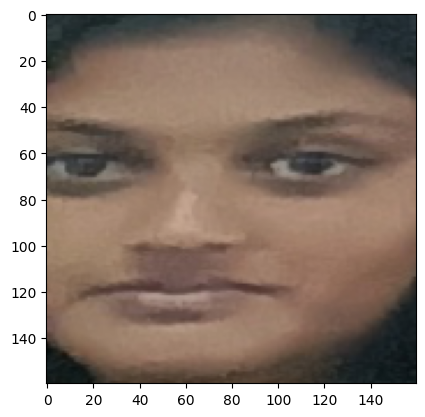

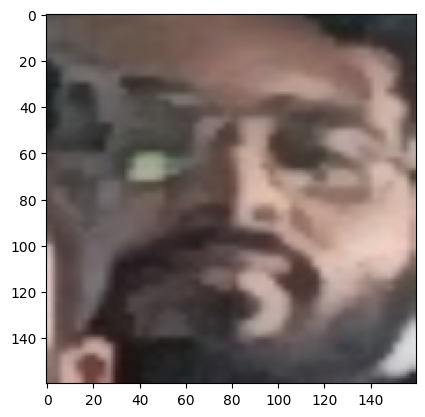

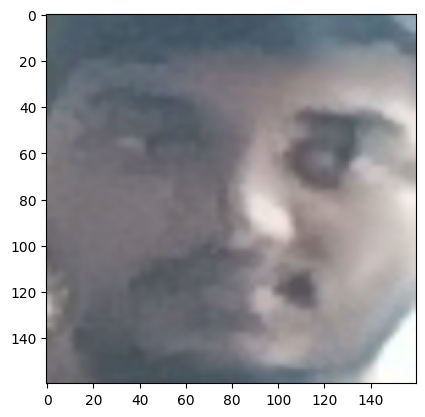

In [ ]:
import cv2 as cv
import numpy as np

face_locs = [] # position of face
test_images = [] # encodings of face
test_image_labels = []
for face in faces:
  x, y, w, h = face['box']
  # face_locs.append((x,y,w,h))
  img = cv.resize(classIMG[y:y+h, x:x+w], (160, 160))
  # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  # img = cv2.filter2D(img, -1, kernel)
  # test_images = np.append(test_images, np.array(img))
  test_images.append(img)
  imgplot = plt.imshow(img)
  plt.show()

numberOfTestImages = len(faces)
# test_images = test_images.reshape(numberOfTestImages, 400, 400, 3)
# print(test_images)

In [ ]:
# train data
# reading training images
import os
import cv2
import numpy as np

training_images_path = 'Train'
train_images = []
train_images_labels = []
for file in os.listdir(training_images_path):
  if file == ".ipynb_checkpoints":
    continue
  img = cv2.imread(training_images_path + "/" + file)
  img = cv2.resize(img, (160, 160))
  # print(img.shape)
  train_images.append(img)
  train_images_labels.append(file.split(".")[0])

# train_images = train_images.reshape(len(train_images_labels), 400, 400, 3)
print(train_images_labels)

['MAHI_MAANAS_REDDY', 'LENIN_VASAN_V_R', 'DESHARAJU_SAI_ABHISHEK', 'KONDREDDY_GOUTHAMI', 'YASH_SETH', 'ATHUL_RAVI', 'MOHAMED_ASHRAF_ALI', 'GOPI_S', 'SANJIL_KC', 'VINAY_VITTAL_MOOLYA', 'ADITHYA_DILEEP_M', 'RAJAT_MISHRA', 'KAUSHIK_K', 'VAIBHAV_THALANKI']


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [ ]:
train_encodings = []
for image in train_images:
  train_encodings.append(get_embedding(image))

print(len(train_encodings))

1/1 [==============================] - 0s 95ms/step
14


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_images_labels)
label_encoded_train_images_labels = encoder.transform(train_images_labels)
print(label_encoded_train_images_labels)

[ 7  6  2  5 13  1  8  3 10 12  0  9  4 11]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
  
pca = PCA(n_components = 50)

PCA_reduced_train_encodings = [pca.fit_transform(train_encodings[0])]
for train_enc in train_encodings[1:]:
  PCA_reduced_train_encodings.append(pca.transform(train_enc))

PCA_reduced_test_encodings = [pca.fit_transform(test_encodings[0])]
for test_enc in test_encodings[1:]:
  PCA_reduced_test_encodings.append(pca.transform(test_enc))  
  
explained_variance = pca.explained_variance_ratio_
print(PCA_reduced_train_encodings[0])

ValueError: ignored

In [ ]:
from sklearn.svm import SVC
face_classifier = SVC(kernel='poly', probability=True)
face_classifier.fit(train_encodings, label_encoded_train_images_labels)
print(face_classifier)

In [ ]:
test_encodings = []
for face in test_images:
  test_encodings.append(get_embedding(face))

print(len(test_encodings))

In [ ]:
predicted_labels = []
for test_face_encoding in test_encodings:
  pred_label = encoder.inverse_transform(face_classifier.predict([test_face_encoding]))
  print(pred_label)
  predicted_labels.append(pred_label)